In [1]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colormaps
from io import StringIO  
import sys
sys.path.append('../')
from utils.results_utils import BaseSubsamplingType
import torch
import pandas as pd
api = wandb.Api()

In [2]:
is_saving_allowed = False
force_recompute = True

entity = 'haraghi'
folder_name = 'paper'
experiment_folder_name = 'fom'

assert not is_saving_allowed, "Are you sure? Please set is_saving_allowed to False."

In [3]:
subfolder_name = os.path.join('../images/subsampling_methods',folder_name,experiment_folder_name)
if is_saving_allowed:
    if not os.path.exists(subfolder_name):
        os.makedirs(subfolder_name)
    # file_path = os.path.join(subfolder_name,"sparsity_vs_acc.tex")

In [7]:
datasets_name_and_num_classes = {
    "NCARS": {"name": "N-Cars", "num_classes": 2},
    "NASL": {"name": "N-ASL", "num_classes": 24},
    "NCALTECH101": {"name": "N-Caltech101", "num_classes": 101},
    "DVSGESTURE_TONIC": {"name": "DVS-Gesture", "num_classes": 11},}
for key,value in datasets_name_and_num_classes.items():
    print(f"{key}: {value['name']}")

NCARS: N-Cars
NASL: N-ASL
NCALTECH101: N-Caltech101
DVSGESTURE_TONIC: DVS-Gesture


In [8]:
kw = "DVS"
projects = api.projects(entity="haraghi")
for project in projects:
    if kw in project.name:
        print(project.name)

Spatiotemporal_DVSGESTURE_TONIC_remaining
Random_DVSGESTURE_TONIC_remaining
Spatial_DVSGESTURE_TONIC_CORRECTED_OFFSET
TOS_2D_Harris_DVS_GESTURE_TONIC_spatial_upsampled
Baseline_EventCount_DVS_GESTURE_TONIC_spatial_upsampled
Temporal_random_offsets_DVS_GESTURE_TONIC
Temporal_dataset_wide_random_offsets_DVS_GESTURE_TONIC
Spatial_dataset_wide_random_offsets_DVS_GESTURE_TONIC
Spatial_with_random_offsets_DVS_GESTURE_TONIC
Spatial_with_offset_DVS_GESTURE_TONIC
Subsamplimg_methods_DVS_GESTURE_TONIC
Subsamplimg_acc_comparision_DVS_GESTURE_TONIC
Subsamplimg-vs-bandwidth-DVS_GESTURE_TONIC
FINAL-DVSGESTURE_TONIC-HP-sweep-reduced
FINAL-DVSGESTURE_TONIC-HP-varyinig-sparsity
EST-DVSGESTURE-HP-sweep-InMemory
EST-DVSGESTURE-HP-sweep


In [9]:
datasets_name_and_project = {
"NASL":            ["Spatial_NASL_CORRECTED_OFFSET_42s",
                    "Temporal_NASL_dataset_wide_random_offsets_42s",
                    "Random_fixed_NASL_42s",
                    ],                  
"FAN1VS3":             "Subsamplimg-vs-bandwidth-FAN1VS3",
"NCALTECH101":      ["Random_fixed_NCALTECH101",
                     "Spatiotemporal_fixed_NCALTECH101",
                     "Temporal_dataset_wide_random_offsets_NCALTECH101",
                     "Spatial_dataset_wide_random_offsets_NCALTECH101",
                     "Baseline_EventCount_NCALTECH101_spatial_upsampled",
                     "TOS_2D_Harris_NCALTECH101",
                    ],
"DVSGESTURE_TONIC": [
                        "Subsamplimg_methods_DVS_GESTURE_TONIC",
                        "Temporal_dataset_wide_random_offsets_DVS_GESTURE_TONIC", 
                        "Spatial_DVSGESTURE_TONIC_CORRECTED_OFFSET",
                        # "Spatial_with_random_offsets_DVS_GESTURE_TONIC",
                        # "Temporal_random_offsets_DVS_GESTURE_TONIC",
                        "Spatiotemporal_DVSGESTURE_TONIC_remaining",
                        "Random_DVSGESTURE_TONIC_remaining",            
                        "Baseline_EventCount_DVS_GESTURE_TONIC_spatial_upsampled",
                        "TOS_2D_Harris_DVS_GESTURE_TONIC_spatial_upsampled",
                    ],
"NCARS":          [
                        "Spatial_NCARS_CORRECTED_OFFSET_100x120_12s",
                        "Spatial_NCARS_CORRECTED_OFFSET_100x120_42s",
                        # "Temporal_dataset_wide_random_offsets_NCARS_42s",
                        # # "Spatiotemporal_fixed_NCARS_42s",
                        "Random_fixed_NCARS_100x120_42s",
                        "Temporal_dataset_wide_random_offset_NCARS_100x120_42s",
                        "Spatial_dataset_wide_random_offsets_NCARS_100x120_42s",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau10",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100",
                        "Spatiotemporal_fixed_NCARS_100x120_42s",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_5x5",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_11x11",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau100_9x9",
                        "Spatiotemporal_fixed_NCARS_100x120_42s_tau30_7x7_mean_normalized",
                        "Baseline_EventCount_NCARS_100x120_42s_spatial_upsampled",
                        "TOS_2D_Harris_NCARS_100x120_24s",
                        "TOS_2D_Harris_NCARS_100x120_12s",
                        "TOS_2D_Harris_NCARS_100x120_42s",
                   ],
}

In [10]:
legend_labels = {
                    'spatial_zero_offsets':     'Spatial (zero offsets)', 
                    'spatial_dataset_wide_random_offsets': 'Spatial (dataset wide random offsets)',
                    'temporal_zero_offset':    'Temporal (zero offset)', 
                    'temporal_zero_offset_fixed_interval': 'Temporal (fixed interval)',
                    'temporal_dataset_wide_random_offset': 'Temporal (dataset wide random offsets)',
                    'random':      'Random (not fixed subsampling)', 
                    'random_fixed': 'Random (fixed subsampling)',
                    'spatiotemporal': 'Spatiotemporal',
                    'spatiotemporal_fixed': 'Spatiotemporal (fixed subsampling)',
                    'spatiotemporal_fixed_30_7x7': 'Spatiotemporal 30 7x7',
                    'spatial_random_offsets': 'Spatial (fixed random offsets)',
                    'temporal_random_offsets': 'Temporal (fixed random offsets)',
                    'spatiotemporal_fixed_normalized_mean': 'Spatiotemporal (mean normalized)', 
                    'baseline_event_count': 'Baseline (event count)',
                    'tos2dharris_fixed': 'TOS 2D Harris',
}

legend_labels_main_short = {
                    'spatial_dataset_wide_random_offsets': 'Spatial',
                    'temporal_dataset_wide_random_offset': 'Temporal',
                    'random_fixed': 'Random',
                    'spatiotemporal_fixed_30_7x7': 'Causal Density-based',
                    'spatiotemporal_fixed_normalized_mean': 'Density-based (mean normalized)',
                    'baseline_event_count': 'Event Count',
                    # 'tos2dharris_fixed': 'TOS 2D Harris',
                    'tos2dharris_fixed': 'Harris Corner Detector', 
}

#   "olive", 
#      "lime", "maroon", "navy", "teal",
#     "gold", "coral", "indigo", "turquoise"

color_dict = {
                'spatial_zero_offsets': 'gray',
                'spatial_dataset_wide_random_offsets': 'red',
                'temporal_zero_offset': 'cyan',
                'temporal_zero_offset_fixed_interval': 'black',
                'temporal_dataset_wide_random_offset': 'green',
                'random': 'pink',
                'random_fixed': 'blue',
                'spatiotemporal_fixed_30_7x7': 'orange',
                'spatiotemporal_fixed': 'cyan',
                'spatial_random_offsets': 'magenta',
                'temporal_random_offsets': 'yellow',
                'spatiotemporal_fixed_normalized_mean': 'violet',
                'baseline_event_count': 'purple',
                'tos2dharris_fixed': 'brown',
}
marker_dict = {
                'spatial_zero_offsets': '-',
                'spatial_dataset_wide_random_offsets': 'o',
                'temporal_zero_offset': 'x',
                'temporal_zero_offset_fixed_interval': '*',
                'temporal_dataset_wide_random_offset': '^',
                'random': '^',
                'random_fixed': 'D',
                'spatiotemporal_fixed_30_7x7': 's',
                'spatiotemporal_fixed': 'x',
                'spatial_random_offsets': '+',
                'temporal_random_offsets': 'p',
                'spatiotemporal_fixed_normalized_mean': 'H',
                'baseline_event_count': '<',
                'tos2dharris_fixed': 'h',
}
dataset_name_dict = {
    "NASL":    "N-ASL"    ,   
    "FAN1VS3":   "Fan1vs3"  ,   
    "NCALTECH101": "N-Caltech101"   ,
    "DVSGESTURE_TONIC": "DVS-Gesture" ,
    "NCARS":          "N-Cars"
}

colormap_list = [
                    'Blues', 
                    'Greens', 
                    'Oranges', 
                    'Reds', 
                    'Purples', 
                    'Greys', 
                    'YlOrBr', 
                    'YlOrRd', 
                    'OrRd', 
                    'PuRd', 
                    'RdPu', 
                    'BuPu', 
                    'GnBu', 
                    'PuBu', 
                    'YlGnBu', 
                    'PuBuGn', 
                    'BuGn', 
                    'YlGn'
                 ]

marker_list = ['o', 's', 'D', 'x', '^', 'v', '<', '>', 'p', 'P', '*', 'X', 'd', 'H', 'h', '+', '|', '_']

- Each curve should has its own class.
- Parameters are those that the accuracies would be averaged over them.
- Each parameter set has **ONLY ONE** test acc.
- (?!) Each dataset has its own class instance.
 

In [11]:
class Spatial(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "spatial_dataset_wide_random_offsets"
        
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "h_r": lambda config: config["transform"]["train"]["spatial_subsampling"]["h_r"],
            "v_r": lambda config: config["transform"]["train"]["spatial_subsampling"]["v_r"],
            "h_r_offset": lambda config: config["transform"]["train"]["spatial_subsampling"]["h_r_offset"],
            "v_r_offset": lambda config: config["transform"]["train"]["spatial_subsampling"]["v_r_offset"],
        }
    
    def zipped_parameters(self):
        return ["h_r", "v_r"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'spatial_subsampling' in cfg_dict and cfg_dict["spatial_subsampling"]["transform"]:
                if 'dataset_wide_random_offsets' in cfg_dict["spatial_subsampling"] and cfg_dict["spatial_subsampling"]["dataset_wide_random_offsets"]:
                    return True
                # if "dataset_wide_random_offset" in run.project:
                #     return True
        return False
                # else:
                #     key_name = 'spatial_zero_offsets'
    

In [12]:
class SpatialRandom(Spatial):

    def get_name(self):
        return "spatial_random_offsets"
        
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "h_r": lambda config: config["transform"]["train"]["spatial_subsampling_random"]["h_r"],
            "v_r": lambda config: config["transform"]["train"]["spatial_subsampling_random"]["v_r"],
        }
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'spatial_subsampling_random' in cfg_dict and cfg_dict["spatial_subsampling_random"]["transform"]:
                return True
        return False
                # else:
                #     key_name = 'spatial_zero_offsets'
    

In [13]:
class SpatialZeroOffset(Spatial):

    def get_name(self):
        return "spatial_zero_offsets"
        
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "h_r": lambda config: config["transform"]["train"]["spatial_subsampling"]["h_r"],
            "v_r": lambda config: config["transform"]["train"]["spatial_subsampling"]["v_r"],
            # "h_r_offset": lambda config: config["transform"]["train"]["spatial_subsampling"]["h_r_offset"],
            # "v_r_offset": lambda config: config["transform"]["train"]["spatial_subsampling"]["v_r_offset"],
        }
    
    def zipped_parameters(self):
        return ["h_r", "v_r"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'spatial_subsampling' in cfg_dict and cfg_dict["spatial_subsampling"]["transform"]:
                if "dataset_wide_random_offset" not in run.project:
                    if 'h_r_offset' in cfg_dict["spatial_subsampling"] and 'v_r_offset' in cfg_dict["spatial_subsampling"]:
                        if cfg_dict["spatial_subsampling"]["h_r_offset"] == 0 and cfg_dict["spatial_subsampling"]["v_r_offset"] == 0:
                            return True
                    else:
                        print("OLD VERSION: h_r_offset or v_r_offset not found in config")
                        return True
        return False
                # else:
                #     key_name = 'spatial_zero_offsets'

In [14]:
class Temporal(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "temporal_dataset_wide_random_offset"
    
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "t_r": lambda config: config["transform"]["train"]["temporal_subsampling"]["subsampling_ratio"],
            "window_size": lambda config: config["transform"]["train"]["temporal_subsampling"]["window_size"],
            "time_offset_coefficient": lambda config: config["transform"]["train"]["temporal_subsampling"]["time_offset_coefficient"],
            # "fixed_interval": lambda config: config["transform"]["train"]["temporal_subsampling"]["fixed_interval"],
        }
    
    def zipped_parameters(self):
        return ["t_r"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'temporal_subsampling' in cfg_dict and cfg_dict["temporal_subsampling"]["transform"]:
                if "dataset_wide_random_offset" in run.project:
                    if "fixed_interval" in cfg_dict["temporal_subsampling"] and cfg_dict["temporal_subsampling"]["fixed_interval"]:
                        return False
                    return True
        return False

In [15]:
class TemporalRandom(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "temporal_random_offsets"
    
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "t_r": lambda config: config["transform"]["train"]["temporal_subsampling_random"]["subsampling_ratio"],
            "window_size": lambda config: config["transform"]["train"]["temporal_subsampling_random"]["window_size"],
            # "time_offset_coefficient": lambda config: config["transform"]["train"]["temporal_subsampling"]["time_offset_coefficient"],
            # "fixed_interval": lambda config: config["transform"]["train"]["temporal_subsampling"]["fixed_interval"],
        }
    
    def zipped_parameters(self):
        return ["t_r"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'temporal_subsampling_random' in cfg_dict and cfg_dict["temporal_subsampling_random"]["transform"]:
                if "fixed_interval" in cfg_dict["temporal_subsampling_random"] and cfg_dict["temporal_subsampling_random"]["fixed_interval"]:
                    return False
                return True
        return False

In [16]:
class TemporalZeroOffset(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "temporal_zero_offset"
    
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "t_r": lambda config: config["transform"]["train"]["temporal_subsampling"]["subsampling_ratio"],
            "window_size": lambda config: config["transform"]["train"]["temporal_subsampling"]["window_size"],
            # "time_offset_coefficient": lambda config: config["transform"]["train"]["temporal_subsampling"]["time_offset_coefficient"],
            # "fixed_interval": lambda config: config["transform"]["train"]["temporal_subsampling"]["fixed_interval"],
        }
    
    def zipped_parameters(self):
        return ["t_r"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'temporal_subsampling' in cfg_dict and cfg_dict["temporal_subsampling"]["transform"]:
                if "dataset_wide_random_offset" not in run.project:
                    if "fixed_interval" in cfg_dict["temporal_subsampling"] and cfg_dict["temporal_subsampling"]["fixed_interval"]:
                        return False
                    if 'time_offset_coefficient' in cfg_dict["temporal_subsampling"]:
                        if cfg_dict["temporal_subsampling"]["time_offset_coefficient"] == 0:
                            return True
                    else:
                        print("OLD VERSION: time_offset_coefficient not found in config")
                        return True
        return False        

In [17]:
class Random(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "random_fixed"
        
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "p": lambda config: config["transform"]["train"]["random_ratio_subsampling"],
            "fixed_subsampling": lambda config: self.get_fixed_vs_not(config),
        }
    
    def get_fixed_vs_not(self, config):
        if 'fixed_sampling' in config['transform']['train'] and config['transform']['train']['fixed_sampling']['transform']:
            if "seed_str" in  config['transform']['train']['fixed_sampling']:
                return config['transform']['train']['fixed_sampling']["seed_str"]
        return None
    
    def zipped_parameters(self):
        return ["p"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'random_ratio_subsampling' in cfg_dict and cfg_dict["random_ratio_subsampling"] is not None:
                if 'fixed_sampling' in cfg_dict and cfg_dict['fixed_sampling']['transform']:
                    return True
        return False

In [18]:
class Spatiotemporal(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "spatiotemporal_fixed"
        
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "tau": lambda config: config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"],
            "filter_size": lambda config: config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"],
            "sampling_threshold": lambda config: config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["sampling_threshold"],
            "normalization_length": lambda config: config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["normalization_length"],
            "fixed_subsampling": lambda config: self.get_fixed_vs_not(config),
        }
    
    def get_fixed_vs_not(self, config):
        if 'fixed_sampling' in config['transform']['train'] and config['transform']['train']['fixed_sampling']['transform']:
            if "seed_str" in  config['transform']['train']['fixed_sampling']:
                return config['transform']['train']['fixed_sampling']["seed_str"]
        return None
    
    def zipped_parameters(self):
        return ["sampling_threshold"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'spatiotemporal_filtering_subsampling' in cfg_dict and cfg_dict["spatiotemporal_filtering_subsampling"]["transform"]:     
                if 'fixed_sampling' in cfg_dict and cfg_dict['fixed_sampling']['transform']:
                    return True
        return False

In [19]:
class TOS2DHarris(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "tos2dharris_fixed"
        
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "TOS_T": lambda config: config["transform"]["train"]["tos_2DHarris_subsampling"]["TOS_T"],
            "filter_size": lambda config: config["transform"]["train"]["tos_2DHarris_subsampling"]["filter_size"],
            "Harris_block_size": lambda config: config["transform"]["train"]["tos_2DHarris_subsampling"]["Harris_block_size"],
            "Harris_ksize": lambda config: config["transform"]["train"]["tos_2DHarris_subsampling"]["Harris_ksize"],
            "Harris_k": lambda config: config["transform"]["train"]["tos_2DHarris_subsampling"]["Harris_k"],
            "sampling_threshold": lambda config: config["transform"]["train"]["tos_2DHarris_subsampling"]["sampling_threshold"],
            "fixed_subsampling": lambda config: self.get_fixed_vs_not(config),
        }
    
    def get_fixed_vs_not(self, config):
        if 'fixed_sampling' in config['transform']['train'] and config['transform']['train']['fixed_sampling']['transform']:
            if "seed_str" in  config['transform']['train']['fixed_sampling']:
                return config['transform']['train']['fixed_sampling']["seed_str"]
        return None
    
    def zipped_parameters(self):
        return ["sampling_threshold"]
     
    def filter_run(self, run):
        if 'transform' in run.config and 'train' in run.config['transform']:
            cfg_dict = run.config["transform"]["train"]
            if 'tos_2DHarris_subsampling' in cfg_dict and cfg_dict["tos_2DHarris_subsampling"]["transform"]:     
                if 'fixed_sampling' in cfg_dict and cfg_dict['fixed_sampling']['transform']:
                    return True
        return False

In [20]:
class BaseLineEventCount(BaseSubsamplingType):
    
    def __init__(self, dataset_name = None, label = None, color = None, marker = None):
        super().__init__(dataset_name = dataset_name, label = label, color = color, marker = marker)

    def get_name(self):
        return "baseline_event_count"
        
    def set_parameter_loader(self):
        return {
            "seed": lambda config: config["seed"],
            "h_r": lambda config: config["pre_transform"]["train"]["baseline_event_count"]["h_r"],
            "v_r": lambda config: config["pre_transform"]["train"]["baseline_event_count"]["v_r"],
            "threshold": lambda config: config["pre_transform"]["train"]["baseline_event_count"]["threshold"],
        }
    
    def zipped_parameters(self):
        return ["h_r", "v_r", "threshold"]
     
    def filter_run(self, run):
        if 'pre_transform' in run.config and 'train' in run.config['pre_transform']:
            cfg_dict = run.config["pre_transform"]["train"]
            if 'baseline_event_count' in cfg_dict and cfg_dict["baseline_event_count"]["transform"]:
                return True
        return False

In [21]:
class Spatiotemporal10(Spatiotemporal):
    def get_name(self):
        return "spatiotemporal_fixed_10_7x7"
    
    def get_color(self):
        return colormap_list[0]
    
    def get_marker(self):
        return marker_list[0]
    
    def filter_run(self, run):
        if super().filter_run(run):
            if run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"] == 10 and run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"] == 7:
                return True
        return False
    
class Spatiotemporal100(Spatiotemporal):
    def get_name(self):
        return "spatiotemporal_fixed_100_7x7"
    
    def get_color(self):
        return colormap_list[1]
    
    def get_marker(self):
        return marker_list[1]
    
    def filter_run(self, run):
        if super().filter_run(run):
            if run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"] == 100 and run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"] == 7:
                return True
        return False
    
class Spatiotemporal30(Spatiotemporal):
    def get_name(self):
        return "spatiotemporal_fixed_30_7x7"
    
    def get_color(self):
        return colormap_list[2]
    
    def get_marker(self):
        return marker_list[2]
    
    def filter_run(self, run):
        if super().filter_run(run):
            if run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"] == 30 and \
                run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"] == 7:
                if "mean_normalized" in run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"] and \
                    run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["mean_normalized"] == True:  
                        return False
                return True
        return False   
    
class Spatiotemporal100_5x5(Spatiotemporal):
    def get_name(self):
        return "spatiotemporal_fixed_100_5x5"
    
    def get_color(self):
        return colormap_list[3]
    
    def get_marker(self):
        return marker_list[3]
    
    def filter_run(self, run):
        if super().filter_run(run):
            if run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"] == 100 and run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"] == 5:
                return True
        return False
    
class Spatiotemporal100_9x9(Spatiotemporal):
    def get_name(self):
        return "spatiotemporal_fixed_100_9x9"
    
    def get_color(self):
        return colormap_list[4]
    
    def get_marker(self):
        return marker_list[4]
    
    def filter_run(self, run):
        if super().filter_run(run):
            if run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"] == 100 and run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"] == 9:
                return True
        return False
    
class Spatiotemporal100_11x11(Spatiotemporal):
    def get_name(self):
        return "spatiotemporal_fixed_100_11x11"
    
    def get_color(self):
        return colormap_list[5]
    
    def get_marker(self):
        return marker_list[5]
    
    def filter_run(self, run):
        if super().filter_run(run):
            if run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"] == 100 and run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"] == 11:
                return True
        return False

class Spatiotemporal_normalized_mean(Spatiotemporal):
    def get_name(self):
        return "spatiotemporal_fixed_normalized_mean"
    
    def get_color(self):
        return colormap_list[6]
    
    def get_marker(self):
        return marker_list[6]
    
    def filter_run(self, run):
        if super().filter_run(run):
            if      run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["tau"] == 30 and \
                    run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["filter_size"] == 7 and \
                    "mean_normalized" in run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"] and \
                    run.config["transform"]["train"]["spatiotemporal_filtering_subsampling"]["mean_normalized"] == True:       
                return True
        return False
    

In [22]:
result_dict = {}
for dataset, project_name in datasets_name_and_project.items():
        
    if dataset != "NCALTECH101" and dataset != "NCARS" and dataset != "DVSGESTURE_TONIC": 
        continue
    
    print('*'*50)
    print(dataset+":", flush=True)
    print('*'*50)
    result_dict[dataset] = [ 
                    Spatial(dataset_name = dataset),
                    Temporal(dataset_name = dataset),
                    Random(dataset_name = dataset),
                    Spatiotemporal30(dataset_name = dataset),
                    # SpatialRandom(dataset_name = dataset),
                    # SpatialZeroOffset(dataset_name = dataset),
                    # TemporalRandom(dataset_name = dataset),
                    # TemporalZeroOffset(dataset_name = dataset),
            
                    # Spatiotemporal10(dataset_name = dataset),
                    # Spatiotemporal30(dataset_name = dataset),
                    # Spatiotemporal100(dataset_name = dataset),
                    # Spatiotemporal100_5x5(dataset_name = dataset),
                    # Spatiotemporal100_9x9(dataset_name = dataset),
                    # Spatiotemporal100_11x11(dataset_name = dataset),
                    Spatiotemporal_normalized_mean(dataset_name = dataset),
                    BaseLineEventCount(dataset_name = dataset),
                    TOS2DHarris(dataset_name = dataset),
                    
                ]

    for result_class in result_dict[dataset]:
        result_class.label = legend_labels[result_class.get_name()] if result_class.get_name() in legend_labels else result_class.get_name()
        result_class.color = color_dict[result_class.get_name()] if result_class.get_name() in color_dict else result_class.get_color()
        result_class.marker = marker_dict[result_class.get_name()] if result_class.get_name() in marker_dict else result_class.get_marker()
        
    if force_recompute or not os.path.exists(f"{dataset}_results.pt"):
        if isinstance(project_name,list):
            runs = []
            for p in project_name:
                print(p, flush=True)
                runs.extend(api.runs(f"{entity}/{p}"))
        else:
            print(project_name, flush=True)
            runs = api.runs(f"{entity}/{project_name}")
        runs = [r for r in runs if r.state == "finished"]
        if len(runs) == 0:
            print(f"No runs found for {project_name}", flush=True)
            continue
        
        for r in runs:
            for result_class in result_dict[dataset]:
                result_class.process_run(r)
        result_to_save = []
        for result_class in result_dict[dataset]:
            result_class.create_data_frames()
            result_to_save.append(result_class.to_dict())
        torch.save(result_to_save, f"{dataset}_results.pt")
        
    else:
        result_to_save = torch.load(f"{dataset}_results.pt")
        for result_class in result_dict[dataset]:
            found_flag = False
            for result in result_to_save:
                if result_class.get_name() == result["name"]:
                    result_class.df = pd.read_json(StringIO(result["df"]))
                    result_class.df_zipped = pd.read_json(StringIO(result["df_zipped"]))
                    result_class._agg_bandwidth_acc()
                    result_class._agg_zipped_parameters()
                    result_class._check_empty_num_events()
                    result_class._clean_data_frame() 
                    result_class. _assert_non_empty_num_events_in_zipped()
                    print(f"Loaded {result_class.get_name()} from {dataset}_results.pt")
                    found_flag = True
                    break
            assert found_flag, f"Result not found for {result_class.get_name()} in {dataset}_results.pt"    


**************************************************
NCALTECH101:
**************************************************
Random_fixed_NCALTECH101
Spatiotemporal_fixed_NCALTECH101
Temporal_dataset_wide_random_offsets_NCALTECH101
Spatial_dataset_wide_random_offsets_NCALTECH101
Baseline_EventCount_NCALTECH101_spatial_upsampled
TOS_2D_Harris_NCALTECH101
**************************************************
DVSGESTURE_TONIC:
**************************************************
Subsamplimg_methods_DVS_GESTURE_TONIC


/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:126: FutureWarning: The provided callable <function nanmean at 0x72e6c40ae3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x72e6c40ae3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanstd at 0x72e6c40aede0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep cur

Temporal_dataset_wide_random_offsets_DVS_GESTURE_TONIC
Spatial_DVSGESTURE_TONIC_CORRECTED_OFFSET
Spatiotemporal_DVSGESTURE_TONIC_remaining
Random_DVSGESTURE_TONIC_remaining
Baseline_EventCount_DVS_GESTURE_TONIC_spatial_upsampled
TOS_2D_Harris_DVS_GESTURE_TONIC_spatial_upsampled
**************************************************
NCARS:
**************************************************
Spatial_NCARS_CORRECTED_OFFSET_100x120_12s


/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:126: FutureWarning: The provided callable <function nanmean at 0x72e6c40ae3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x72e6c40ae3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanstd at 0x72e6c40aede0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep cur

Spatial_NCARS_CORRECTED_OFFSET_100x120_42s
Random_fixed_NCARS_100x120_42s
Temporal_dataset_wide_random_offset_NCARS_100x120_42s
Spatial_dataset_wide_random_offsets_NCARS_100x120_42s
Spatiotemporal_fixed_NCARS_100x120_42s_tau10
Spatiotemporal_fixed_NCARS_100x120_42s_tau100
Spatiotemporal_fixed_NCARS_100x120_42s
Spatiotemporal_fixed_NCARS_100x120_42s_tau100_5x5
Spatiotemporal_fixed_NCARS_100x120_42s_tau100_11x11
Spatiotemporal_fixed_NCARS_100x120_42s_tau100_9x9
Spatiotemporal_fixed_NCARS_100x120_42s_tau30_7x7_mean_normalized
Baseline_EventCount_NCARS_100x120_42s_spatial_upsampled
TOS_2D_Harris_NCARS_100x120_24s
TOS_2D_Harris_NCARS_100x120_12s
TOS_2D_Harris_NCARS_100x120_42s


/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:126: FutureWarning: The provided callable <function nanmean at 0x72e6c40ae3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanmean at 0x72e6c40ae3e0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  as_index=False).agg(
/home/hesam/Projects/DGCNN_CV_format/subsampling_figures/../utils/results_utils.py:112: FutureWarning: The provided callable <function nanstd at 0x72e6c40aede0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep cur

In [23]:
def plot_all(result_list, save_to = None):
    
    if not isinstance(result_list, list):
        result_list = [result_list]
    
    unique_tuples = [r.df.sort_values(by="num_events")[r._zipped_parameters_label].unique() for r in result_list]

    # Generate a color for each unique tuple
    colors_list = [colormaps[colormap_list[i]](np.linspace(0.2, 0.8, len(unique_tuples[i]))) for i in range(len(result_list))]  
    line_colors_list = [colormaps[colormap_list[i]](0.5) for i in range(len(result_list))]  

    # Create a mapping from tuples to colors
    tuple_to_color_list = [{t: colors[i] for i, t in enumerate(unique_tuples[j])} for j, colors in enumerate(colors_list)] 
    
    plt.subplots(figsize=(10, 6))
    for i, result in enumerate(result_list):
        plt.scatter(result.df['num_events'], result.df['test_acc'], 
                    c=[tuple_to_color_list[i][pr] for pr in result.df[result._zipped_parameters_label]],
                    marker='o', 
                    s=8, 
                    label=legend_labels_main_short[result.get_name()],
                    )

        plt.errorbar(result.df_zipped['num_events']['nanmean'], result.df_zipped['test_acc']['nanmean'], 
                            # xerr=result.df_zipped['num_events']["nanstd"],
                            yerr=result.df_zipped['test_acc']["nanstd"], 
                            # label=result.label,
                            label=legend_labels_main_short[result.get_name()],
                            # ecolor=line_colors_list[i],
                            ecolor=color_dict[result.get_name()],
                            # c=line_colors_list[i],
                            c=color_dict[result.get_name()],
                            capsize=5, 
                            # marker='o', 
                            marker=marker_dict[result.get_name()],
                            linestyle=':', 
                            markersize=8, 
                            markeredgewidth=1,
                            linewidth=3, 
                            elinewidth=2, 
                            alpha=.85)

    plt.xlabel('#events per video', fontsize=18)  # Increase label font size
    plt.ylabel('Accuracy', fontsize=18)  # Increase label font size
    plt.title('Accuracy (with std error bars) vs #events', fontsize=20)  # Increase title font size
    plt.xscale('log')  # Log scale if sparsity values span several orders of magnitude

    plt.xticks(fontsize=16)  # Increase tick font size
    plt.yticks(fontsize=16)  # Increase tick font size
    plt.grid(True)
    plt.legend(
        fontsize=16,
        # bbox_to_anchor=(1.04, 0), 
        loc="lower right", 
        # borderaxespad=0,
        )  # Increase legend font size , 
    if save_to:
        plt.savefig(save_to, bbox_inches='tight')
    plt.show()


0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


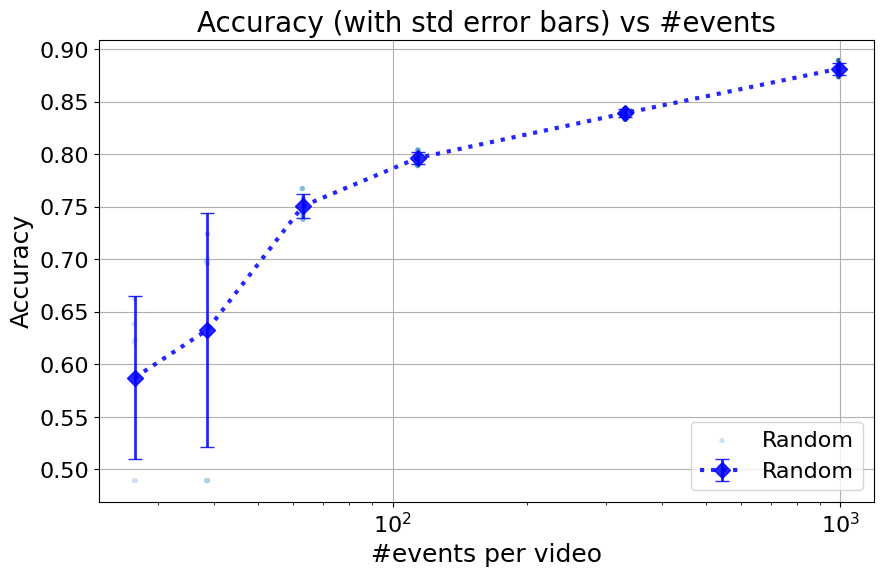

In [24]:
ds_name = "NCARS" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [2]],save_to=save_to_path)

In [25]:
ds_name = "DVSGESTURE_TONIC" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label} {len(r.df['test_acc'])}")

0: Spatial (dataset wide random offsets) 108
1: Temporal (dataset wide random offsets) 108
2: Random (fixed subsampling) 108
3: Spatiotemporal 30 7x7 108
4: Spatiotemporal (mean normalized) 0
5: Baseline (event count) 108
6: TOS 2D Harris 108


In [26]:
result_dict["DVSGESTURE_TONIC"][3].df_zipped

sampling_threshold_zipped   val_acc            test_acc            \
                              nanmean    nanstd   nanmean    nanstd   
0                 (0.0018,)  0.781606  0.018271  0.715158  0.015579   
1                  (0.004,)  0.877198  0.019640  0.815236  0.032841   
2                  (0.009,)  0.935340  0.012481  0.889069  0.015632   
3                  (0.026,)  0.962135  0.006820  0.914932  0.012871   
4                  (0.086,)  0.974136  0.004084  0.932540  0.008514   
5                  (0.216,)  0.981481  0.004307  0.936748  0.006591   

      bandwidth              num_events            
        nanmean    nanstd       nanmean    nanstd  
0    128.308418  0.110270    214.201065  0.182850  
1    277.944672  0.313538    467.770096  0.503672  
2    620.779643  0.426446   1049.504723  0.739276  
3   1787.471273  0.522621   3031.078784  0.955926  
4   5902.656494  1.192442  10024.645414  2.057835  
5  14720.335286  0.590036  25012.916182  1.103447

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


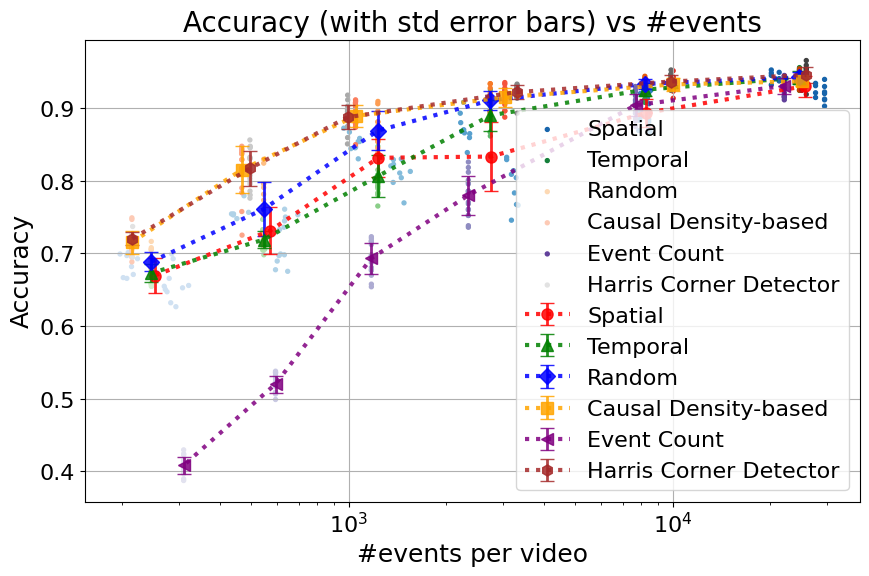

In [27]:
ds_name = "DVSGESTURE_TONIC" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [0,1,2,3,5,6]],save_to=save_to_path)

0: Spatial (dataset wide random offsets)
1: Temporal (dataset wide random offsets)
2: Random (fixed subsampling)
3: Spatiotemporal 30 7x7
4: Spatiotemporal (mean normalized)
5: Baseline (event count)
6: TOS 2D Harris


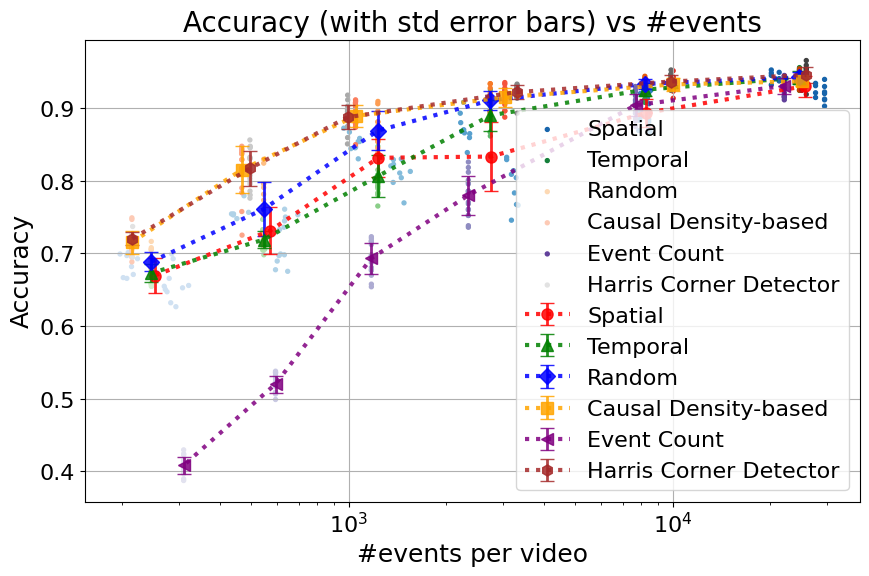

In [28]:
ds_name = "DVSGESTURE_TONIC" 
for ii,r in enumerate(result_dict[ds_name]):
    print(f"{ii}: {r.label}")
if is_saving_allowed:
    save_to_path = os.path.join(subfolder_name,f'{ds_name}.eps')
else:
    save_to_path = None
plot_all([result_dict[ds_name][i] for i in [0,1,2,3,5,6]],save_to=save_to_path)

In [29]:
ds_name = "DVSGESTURE_TONIC"
from sklearn.metrics import auc

# Example False Positive Rate (FPR) and True Positive Rate (TPR) values

xs = (result_dict[ds_name][3].df["num_events"])
ys = result_dict[ds_name][3].df["test_acc"]
# sort xs and ys by the increasing xs
xs, ys = zip(*sorted(zip(xs, ys)))

# Compute AUC using trapezoidal integration
roc_auc = auc(xs, ys)

print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 23132.4251


In [30]:
sorted(zip(xs, ys))

[(214.05781535648995, 0.7121211886405945),
 (214.058836996337, 0.7240259647369385),
 (214.11245714285715, 0.7040043473243713),
 (214.20106457007648, 0.688311755657196),
 (214.20106457007648, 0.6948052048683167),
 (214.20106457007648, 0.6991341710090637),
 (214.20106457007648, 0.7067100405693054),
 (214.20106457007648, 0.7067100405693054),
 (214.20106457007648, 0.7110388875007629),
 (214.20106457007648, 0.714285671710968),
 (214.20106457007648, 0.7175324559211731),
 (214.20106457007648, 0.7186147570610046),
 (214.20106457007648, 0.7218615412712097),
 (214.20106457007648, 0.7467532753944397),
 (214.20106457007648, 0.7489177584648132),
 (214.2123772550811, 0.7251082062721252),
 (214.22021495540815, 0.7110389471054077),
 (214.54468571428572, 0.7218614816665649),
 (467.20888490015705, 0.8376623392105103),
 (467.29283629014145, 0.8138527870178223),
 (467.6576172313215, 0.8095237016677856),
 (467.7700958358798, 0.7575758099555969),
 (467.7700958358798, 0.7835497856140137),
 (467.7700958358798